In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%config InlineBackend.figure_format = 'retina'

In [2]:
batch_size = 128

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,)),
                       torch.flatten
                   ])), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,)),
                       torch.flatten
                   ])), batch_size=batch_size, shuffle=True)

standard neural network with an MLE parameter configuration

In [4]:
class Classifier_MLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.h1  = nn.Linear(in_dim, hidden_dim)
        self.h2  = nn.Linear(hidden_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, out_dim)
        self.out_dim = out_dim

    def forward(self, x):
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.log_softmax(self.out(x))
        return x

In [5]:
input_size    = 784   # image size = 28 x 28 = 784
hidden_size   = 1200  
num_classes   = 10    # from 0 to 9
learning_rate = 1e-3

MLP = Classifier_MLP(in_dim=input_size, hidden_dim=hidden_size, out_dim=num_classes)
optimizer = torch.optim.SGD(MLP.parameters(), lr=learning_rate)

In [12]:
epochs = 600
ACC_re=[]
for epoch in range(epochs): 
    for batch, (x_train, y_train) in enumerate(train_loader):
        optimizer.zero_grad()
        pred = MLP(x_train)
        loss = F.nll_loss(pred, y_train)
        loss.backward()
        optimizer.step()

    learning_rate /= 1.1
    test_losses, test_accs = [], []
    for i, (x_test, y_test) in enumerate(test_loader):
        optimizer.zero_grad()
        pred = MLP(x_test)
        loss = F.nll_loss(pred, y_test)
        acc = (pred.argmax(dim=-1) == y_test).to(torch.float32).mean()
#         print(i,acc)
        test_losses.append(loss.item())
        test_accs.append(acc.item())
    print('Loss: {}, Accuracy: {}'.format(np.mean(test_losses), np.mean(test_accs)))
    ACC_re.append(np.mean(test_accs))
print('Finished Training')

E:\Anaconda\envs\pytorch_cuda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Loss: 0.42086658730537074, Accuracy: 0.890625
Loss: 0.4169200285326076, Accuracy: 0.8907238924050633
Loss: 0.4071555231945424, Accuracy: 0.8908227848101266
Loss: 0.4030108557471746, Accuracy: 0.8928995253164557
Loss: 0.3947013578837431, Accuracy: 0.8924050632911392
Loss: 0.3880909402159196, Accuracy: 0.8955696202531646
Loss: 0.38885973299605936, Accuracy: 0.896064082278481
Loss: 0.3783540295649178, Accuracy: 0.897745253164557
Loss: 0.3732879686204693, Accuracy: 0.8982397151898734
Loss: 0.37159044663362867, Accuracy: 0.899129746835443
Loss: 0.3642966843481305, Accuracy: 0.8994264240506329
Loss: 0.36353916420212273, Accuracy: 0.9000197784810127
Loss: 0.3570991760190529, Accuracy: 0.901503164556962
Loss: 0.35620840667169307, Accuracy: 0.8992286392405063
Loss: 0.3477354877734486, Accuracy: 0.9037776898734177
Loss: 0.34687485008300106, Accuracy: 0.9040743670886076
Loss: 0.34435869225218324, Accuracy: 0.9027887658227848
Loss: 0.3398793369908876, Accuracy: 0.9065466772151899
Loss: 0.338567248

Loss: 0.20568468035021914, Accuracy: 0.9410601265822784
Loss: 0.2046268174919901, Accuracy: 0.9413568037974683
Loss: 0.20514570968815043, Accuracy: 0.9407634493670886
Loss: 0.20111022238867193, Accuracy: 0.9414556962025317
Loss: 0.20047269940753526, Accuracy: 0.9411590189873418
Loss: 0.20115947525335265, Accuracy: 0.9417523734177216
Loss: 0.197465024275493, Accuracy: 0.9435324367088608
Loss: 0.19782514049659802, Accuracy: 0.9427412974683544
Loss: 0.19998573511838913, Accuracy: 0.9414556962025317
Loss: 0.19774177538443216, Accuracy: 0.9426424050632911
Loss: 0.19664223171487638, Accuracy: 0.9427412974683544
Loss: 0.19645405334385135, Accuracy: 0.9435324367088608
Loss: 0.19857602406151686, Accuracy: 0.9431368670886076
Loss: 0.19618063495506213, Accuracy: 0.9415545886075949
Loss: 0.20072415475792524, Accuracy: 0.942939082278481
Loss: 0.19334861673886264, Accuracy: 0.9435324367088608
Loss: 0.1921116618227355, Accuracy: 0.9445213607594937
Loss: 0.19353188527158544, Accuracy: 0.94333465189873

Loss: 0.13899097591638565, Accuracy: 0.9587618670886076
Loss: 0.1388087958521858, Accuracy: 0.959256329113924
Loss: 0.14043334994135023, Accuracy: 0.9584651898734177
Loss: 0.13839850159762782, Accuracy: 0.9589596518987342
Loss: 0.13900337646467775, Accuracy: 0.9583662974683544
Loss: 0.13946688618463807, Accuracy: 0.9586629746835443
Loss: 0.14149769155096403, Accuracy: 0.9575751582278481
Loss: 0.13696900514084137, Accuracy: 0.9591574367088608
Loss: 0.1390450054991849, Accuracy: 0.9575751582278481
Loss: 0.13660666938352434, Accuracy: 0.9590585443037974
Loss: 0.13663881125895283, Accuracy: 0.958564082278481
Loss: 0.1365849429953702, Accuracy: 0.9587618670886076
Loss: 0.13663570002853115, Accuracy: 0.9587618670886076
Loss: 0.13534602784563468, Accuracy: 0.9593552215189873
Loss: 0.1360303096567528, Accuracy: 0.9593552215189873
Loss: 0.1399703660531889, Accuracy: 0.9590585443037974
Loss: 0.13634026144878775, Accuracy: 0.9580696202531646
Loss: 0.13471290025907226, Accuracy: 0.9603441455696202

Loss: 0.10752547810537906, Accuracy: 0.9659810126582279
Loss: 0.10613655199921584, Accuracy: 0.9666732594936709
Loss: 0.10668592084246346, Accuracy: 0.9662776898734177
Loss: 0.10632765665650368, Accuracy: 0.9665743670886076
Loss: 0.1060084573971697, Accuracy: 0.9665743670886076
Loss: 0.10697740771442274, Accuracy: 0.9655854430379747
Loss: 0.10611132475771481, Accuracy: 0.966376582278481
Loss: 0.10602574500762209, Accuracy: 0.9665743670886076
Loss: 0.10567921838617023, Accuracy: 0.9657832278481012
Loss: 0.10580290108919144, Accuracy: 0.9665743670886076
Loss: 0.10704889462058302, Accuracy: 0.9659810126582279
Loss: 0.10538605129039741, Accuracy: 0.9665743670886076
Loss: 0.10944135550739645, Accuracy: 0.9653876582278481
Loss: 0.1043612792781448, Accuracy: 0.9667721518987342
Loss: 0.10475364916875393, Accuracy: 0.9671677215189873
Loss: 0.104637750719167, Accuracy: 0.9671677215189873
Loss: 0.10407847571599332, Accuracy: 0.9671677215189873
Loss: 0.1038825527965268, Accuracy: 0.967266613924050

Loss: 0.08801324177486232, Accuracy: 0.9719145569620253
Loss: 0.09041071093723743, Accuracy: 0.9717167721518988
Loss: 0.08834300939983959, Accuracy: 0.9717167721518988
Loss: 0.08740897284514165, Accuracy: 0.9723101265822784
Loss: 0.08753898492247998, Accuracy: 0.9723101265822784
Loss: 0.08761313147371329, Accuracy: 0.9722112341772152
Finished Training


In [21]:
ACC_re1=[]
for i in range(len(ACC_re)):
    ACC_re1.append(1-ACC_re[i])

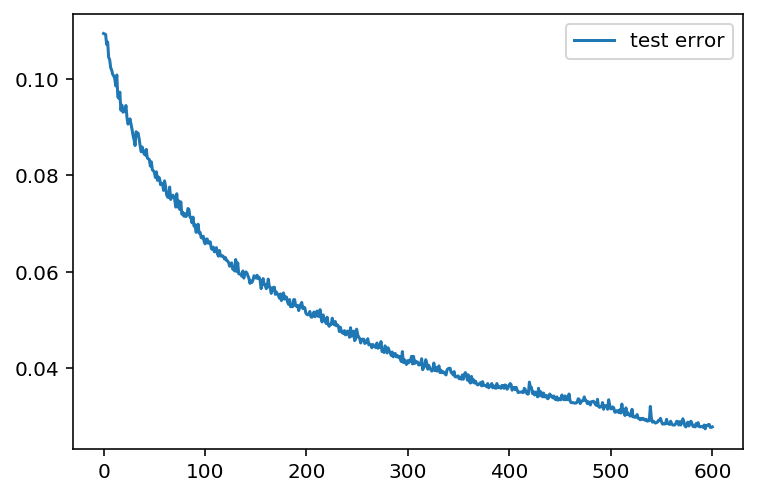

In [26]:
x = torch.linspace(0,600,600).reshape(-1,1)
plt.plot(x.numpy(),ACC_re1,label = 'test error')

plt.legend()
plt.show()

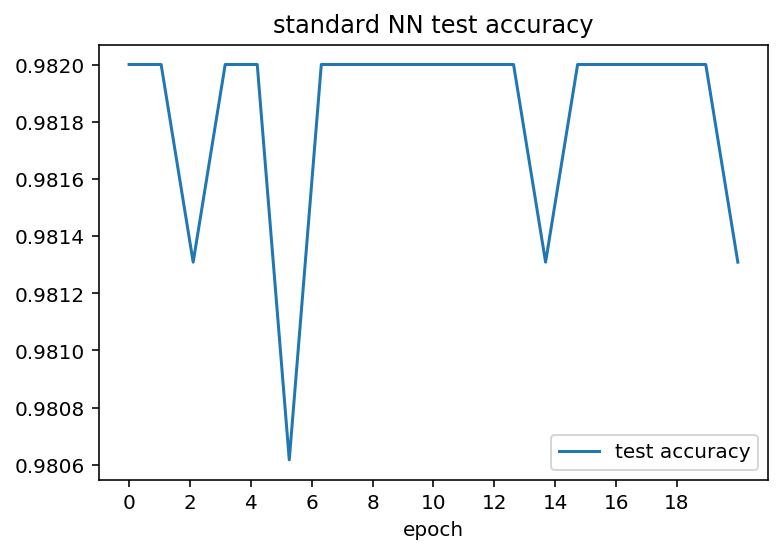

In [19]:
x_test = torch.linspace(0,20,20).reshape(-1,1)
plt.plot(x_test.numpy(),ACC_re,label = 'test accuracy')

my_x_ticks = np.arange(0, 20, 2)
plt.xticks(my_x_ticks)
plt.xlabel('epoch')

plt.title('standard NN test accuracy')
plt.legend()
plt.savefig("standard NN test accuracy")
plt.show()

Bayes By Backprop

In [4]:
class Layer_BbB(nn.Module):
    
    def __init__(self, input_features, output_features, prior_var=6):
        super().__init__()
        self.input_features = input_features
        self.output_features = output_features

        # initialize w1 and w2 as μ and σ for weights
        self.w1 = nn.Parameter(torch.zeros(output_features, input_features).uniform_(-0.6, 0.6))
        self.w2 = nn.Parameter(torch.zeros(output_features, input_features).uniform_(-6,-6))
        # initialize b1 and b2 as μ and σ for bias
        self.b1 = nn.Parameter(torch.zeros(output_features).uniform_(-0.6, 0.6))
        self.b2 = nn.Parameter(torch.zeros(output_features).uniform_(-6,-6))        

        w_eps = Normal(0,1).sample(self.w1.shape)
        self.w = self.w1 + torch.log(1+torch.exp(self.w2)) * w_eps
        b_eps = Normal(0,1).sample(self.b1.shape)
        self.b = self.b1 + torch.log(1+torch.exp(self.b2)) * b_eps
        self.prior = torch.distributions.Normal(0,prior_var)

    def forward(self, input):
        w_eps = Normal(0,1).sample(self.w1.shape)
        self.w = self.w1 + torch.log(1+torch.exp(self.w2)) * w_eps

        b_eps = Normal(0,1).sample(self.b1.shape)
        self.b = self.b1 + torch.log(1+torch.exp(self.b2)) * b_eps

        w_log_prior = self.prior.log_prob(self.w)
        b_log_prior = self.prior.log_prob(self.b)
        self.log_prior = torch.sum(w_log_prior) + torch.sum(b_log_prior)

        self.w_post = Normal(self.w1.data, torch.log(1+torch.exp(self.w2)))
        self.b_post = Normal(self.b1.data, torch.log(1+torch.exp(self.b2)))
        self.log_post = self.w_post.log_prob(self.w).sum() + self.b_post.log_prob(self.b).sum()
        
        out = F.linear(input, self.w, self.b)

        return out

In [5]:
class NN_BbB(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.h1  = Layer_BbB(in_dim, hidden_dim)
        self.h2  = Layer_BbB(hidden_dim, hidden_dim)
        self.out = Layer_BbB(hidden_dim, out_dim)
        self.out_dim = out_dim

    def forward(self, x):
        x = torch.sigmoid(self.h1(x))
        x = torch.sigmoid(self.h2(x))
        x = F.log_softmax(self.out(x))
        return x


    def loss(self, input, target, samples):
        outputs = torch.zeros(samples, target.shape[0], self.out_dim)
        log_priors = torch.zeros(samples)
        log_posts = torch.zeros(samples)
        for i in range(samples):
            outputs[i] = self(input)
            log_priors[i] = self.log_prior()
            log_posts[i] = self.log_post()
        log_prior = log_priors.mean()
        log_post = log_posts.mean()
        log_likes = F.nll_loss(outputs.mean(0), target, reduction='sum')
        loss = (log_post - log_prior)/num_batches + log_likes
        return loss, outputs
    
    def log_prior(self):
        return self.h1.log_prior + self.h2.log_prior + self.out.log_prior
    
    def log_post(self):
        return self.h1.log_post + self.h2.log_post + self.out.log_post
    
    def forward(self, x):
        x = torch.sigmoid(self.h1(x))
        x = torch.sigmoid(self.h2(x))
        x = F.log_softmax(self.out(x))
        return x

In [6]:
input_size    = 784
hidden_size   = 400
num_classes   = 10    
learning_rate = torch.tensor(1e-3)
num_batches   = 60000 / batch_size

classifier = NN_BbB(in_dim=input_size, hidden_dim=hidden_size, out_dim=num_classes)
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

In [7]:
ACC_re2=[]
epochs = 600
for epoch in range(epochs):  
    for batch, (x_train, y_train) in enumerate(train_loader):
        optimizer.zero_grad()
        loss, _ = classifier.loss(x_train, y_train, 1)
        loss.backward()
        optimizer.step()

    learning_rate /= 1.1
    test_losses, test_accs = [], []
    for i, (x_test, y_test) in enumerate(test_loader):
        test_loss, test_pred = classifier.sample_elbo(x_test, y_test, 5)
        acc = (test_pred.mean(dim=0).argmax(dim=-1) == y_test).to(torch.float32).mean()
        test_losses.append(test_loss.item())
        test_accs.append(acc.mean().item())
    print(epoch,':','Loss: {}, Accuracy: {}'.format(np.mean(test_losses), np.mean(test_accs)))
    ACC_re2.append(np.mean(test_accs))
print('Finished Training')

E:\Anaconda\envs\pytorch_cuda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


0 : Loss: 7022.210078372231, Accuracy: 0.9025909810126582
1 : Loss: 6585.370067741297, Accuracy: 0.9262262658227848
2 : Loss: 6196.469738924051, Accuracy: 0.9319620253164557
3 : Loss: 5843.985067246836, Accuracy: 0.9428401898734177
4 : Loss: 5530.522232248813, Accuracy: 0.9461036392405063
5 : Loss: 5251.070170342167, Accuracy: 0.9497626582278481
6 : Loss: 5002.959676621836, Accuracy: 0.9553995253164557
7 : Loss: 4784.3972384295885, Accuracy: 0.9553995253164557
8 : Loss: 4591.877923506725, Accuracy: 0.9613330696202531
9 : Loss: 4423.468150464794, Accuracy: 0.9619264240506329
10 : Loss: 4275.439743621439, Accuracy: 0.9639042721518988
11 : Loss: 4145.488231803797, Accuracy: 0.9652887658227848
12 : Loss: 4031.2199119857596, Accuracy: 0.9650909810126582
13 : Loss: 3930.6659260037577, Accuracy: 0.9667721518987342
14 : Loss: 3842.0710140179986, Accuracy: 0.9675632911392406
15 : Loss: 3764.017822265625, Accuracy: 0.9683544303797469
16 : Loss: 3694.665610784217, Accuracy: 0.9696400316455697
17 

138 : Loss: 3095.2557512114317, Accuracy: 0.9740901898734177
139 : Loss: 3095.6200182950947, Accuracy: 0.9730023734177216
140 : Loss: 3095.4758084454115, Accuracy: 0.974189082278481
141 : Loss: 3095.1733367533625, Accuracy: 0.973496835443038
142 : Loss: 3095.2677790001976, Accuracy: 0.974189082278481
143 : Loss: 3095.320612267603, Accuracy: 0.9729034810126582
144 : Loss: 3095.5337439428404, Accuracy: 0.9733979430379747
145 : Loss: 3095.319861303402, Accuracy: 0.9746835443037974
146 : Loss: 3095.2945819323577, Accuracy: 0.9739912974683544
147 : Loss: 3095.6053049594543, Accuracy: 0.9719145569620253
148 : Loss: 3095.49072265625, Accuracy: 0.974189082278481
149 : Loss: 3095.3967872329904, Accuracy: 0.9735957278481012
150 : Loss: 3095.126004375989, Accuracy: 0.9732001582278481
151 : Loss: 3095.400334998022, Accuracy: 0.9735957278481012
152 : Loss: 3095.3972291584255, Accuracy: 0.9733979430379747
153 : Loss: 3095.401781299446, Accuracy: 0.9739912974683544
154 : Loss: 3095.257766144185, Accu

274 : Loss: 3095.3196140723894, Accuracy: 0.9737935126582279
275 : Loss: 3094.9236148882514, Accuracy: 0.9760680379746836
276 : Loss: 3095.3098082723495, Accuracy: 0.9738924050632911
277 : Loss: 3095.1601068037976, Accuracy: 0.9749802215189873
278 : Loss: 3095.4496761273736, Accuracy: 0.9730023734177216
279 : Loss: 3095.4935287282437, Accuracy: 0.9752768987341772
280 : Loss: 3095.4447469590586, Accuracy: 0.9735957278481012
281 : Loss: 3095.5390223249606, Accuracy: 0.9738924050632911
282 : Loss: 3095.2102205300635, Accuracy: 0.9740901898734177
283 : Loss: 3095.2637893097312, Accuracy: 0.9749802215189873
284 : Loss: 3095.602838830103, Accuracy: 0.974189082278481
285 : Loss: 3095.2830918710442, Accuracy: 0.9746835443037974
286 : Loss: 3095.2868343304986, Accuracy: 0.9745846518987342
287 : Loss: 3095.4382540545885, Accuracy: 0.973496835443038
288 : Loss: 3095.6529185621043, Accuracy: 0.9733979430379747
289 : Loss: 3095.484789111946, Accuracy: 0.9744857594936709
290 : Loss: 3095.53976710838

410 : Loss: 3095.3145829212817, Accuracy: 0.9743868670886076
411 : Loss: 3095.3078304242486, Accuracy: 0.9740901898734177
412 : Loss: 3095.3399920886077, Accuracy: 0.9743868670886076
413 : Loss: 3095.187537084652, Accuracy: 0.9751780063291139
414 : Loss: 3095.586237267603, Accuracy: 0.9739912974683544
415 : Loss: 3095.4151255933543, Accuracy: 0.9744857594936709
416 : Loss: 3095.3467662183543, Accuracy: 0.974189082278481
417 : Loss: 3095.4886397349683, Accuracy: 0.9751780063291139
418 : Loss: 3095.5272757614716, Accuracy: 0.9724090189873418
419 : Loss: 3095.1943390278875, Accuracy: 0.973496835443038
420 : Loss: 3095.5220251928404, Accuracy: 0.9731012658227848
421 : Loss: 3095.197472680973, Accuracy: 0.9751780063291139
422 : Loss: 3095.5244449663764, Accuracy: 0.9746835443037974
423 : Loss: 3095.4153326493274, Accuracy: 0.9743868670886076
424 : Loss: 3095.316848175435, Accuracy: 0.9744857594936709
425 : Loss: 3095.1905162183543, Accuracy: 0.9750791139240507
426 : Loss: 3095.402062524723,

546 : Loss: 3095.3645606704904, Accuracy: 0.9730023734177216
547 : Loss: 3095.2312877027293, Accuracy: 0.9750791139240507
548 : Loss: 3095.134493670886, Accuracy: 0.9721123417721519
549 : Loss: 3095.3583459009096, Accuracy: 0.9738924050632911
550 : Loss: 3095.2817321004745, Accuracy: 0.973496835443038
551 : Loss: 3095.6168630092957, Accuracy: 0.9746835443037974
552 : Loss: 3095.3119128263447, Accuracy: 0.9733979430379747
553 : Loss: 3095.4472872577135, Accuracy: 0.9731012658227848
554 : Loss: 3095.5711685373813, Accuracy: 0.9749802215189873
555 : Loss: 3095.6178859276106, Accuracy: 0.9747824367088608
556 : Loss: 3095.5197413963606, Accuracy: 0.9751780063291139
557 : Loss: 3095.0847662430774, Accuracy: 0.975870253164557
558 : Loss: 3095.342340783228, Accuracy: 0.9732990506329114
559 : Loss: 3095.5290929094144, Accuracy: 0.9736946202531646
560 : Loss: 3095.410193334652, Accuracy: 0.9743868670886076
561 : Loss: 3095.2409080795096, Accuracy: 0.9739912974683544
562 : Loss: 3095.506941010680

In [8]:
classifier

Classifier_BBB(
  (h1): Linear_BBB()
  (h2): Linear_BBB()
  (out): Linear_BBB()
)

In [9]:
for name,parameters in classifier.named_parameters():
    print(name,':',parameters.size())

h1.w_mu : torch.Size([400, 784])
h1.w_rho : torch.Size([400, 784])
h1.b_mu : torch.Size([400])
h1.b_rho : torch.Size([400])
h2.w_mu : torch.Size([400, 400])
h2.w_rho : torch.Size([400, 400])
h2.b_mu : torch.Size([400])
h2.b_rho : torch.Size([400])
out.w_mu : torch.Size([10, 400])
out.w_rho : torch.Size([10, 400])
out.b_mu : torch.Size([10])
out.b_rho : torch.Size([10])


In [13]:
P={}
for name,parameters in classifier.named_parameters():
    P[name]=parameters

In [14]:
P

{'h1.w_mu': Parameter containing:
 tensor([[-0.1264, -0.4302,  0.5566,  ..., -0.3265, -0.1277, -0.0517],
         [-0.1777, -0.4820,  0.0307,  ...,  0.0399, -0.0698,  0.3428],
         [-0.0199,  0.1974,  0.6166,  ..., -0.0945, -0.4749, -0.4919],
         ...,
         [-0.4181,  0.4809, -0.0386,  ..., -0.4182, -0.3776, -0.3037],
         [-0.0362, -0.4441,  0.1643,  ..., -0.4986,  0.1227, -0.3402],
         [-0.4337, -0.3877, -0.0157,  ...,  0.0883, -0.0309,  0.0257]],
        requires_grad=True), 'h1.w_rho': Parameter containing:
 tensor([[-0.8708, -0.8708, -0.8709,  ..., -0.8708, -0.8708, -0.8708],
         [-0.8708, -0.8708, -0.8708,  ..., -0.8708, -0.8708, -0.8709],
         [-0.8708, -0.8708, -0.8709,  ..., -0.8708, -0.8709, -0.8708],
         ...,
         [-0.8708, -0.8709, -0.8708,  ..., -0.8708, -0.8708, -0.8708],
         [-0.8708, -0.8709, -0.8708,  ..., -0.8708, -0.8708, -0.8708],
         [-0.8709, -0.8708, -0.8708,  ..., -0.8708, -0.8708, -0.8708]],
        requires_grad

In [16]:
e=Normal(0,1).sample([400,784])
w_h1=P["h1.w_mu"]+torch.log(1+torch.exp(P["h1.w_rho"]))*e

In [19]:
e=Normal(0,1).sample([400,400])
w_h2=P["h2.w_mu"]+torch.log(1+torch.exp(P["h2.w_rho"]))*e

In [20]:
e=Normal(0,1).sample([10,400])
w_out=P["out.w_mu"]+torch.log(1+torch.exp(P["out.w_rho"]))*e

In [35]:
CC=[]
for i in range(len(w_h1)):
    for j in range(len(w_h1[0])):
            CC.append(w_h1[i][j].item())
            
for i in range(len(w_h2)):
    for j in range(len(w_h2[0])):
            CC.append(w_h2[i][j].item())
        
for i in range(len(w_out)):
    for j in range(len(w_out[0])):
            CC.append(w_out[i][j].item())

E:\Anaconda\envs\pytorch_cuda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


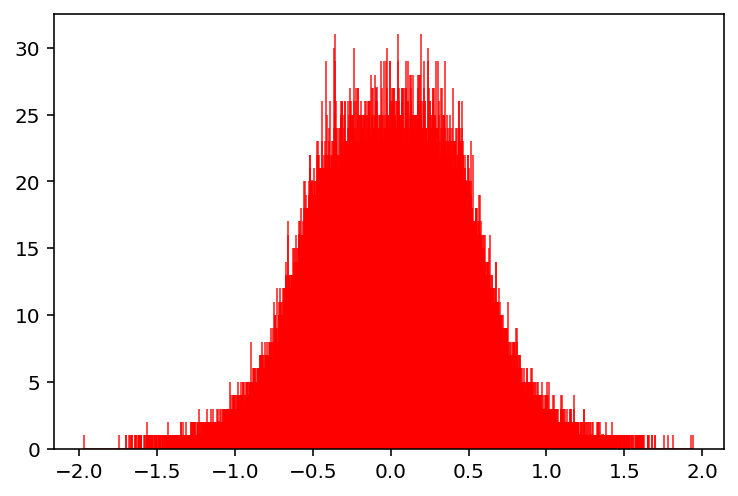

In [36]:
plt.hist(CC, bins=100000, normed=0, facecolor="blue", edgecolor="red", alpha=0.7)
plt.show()

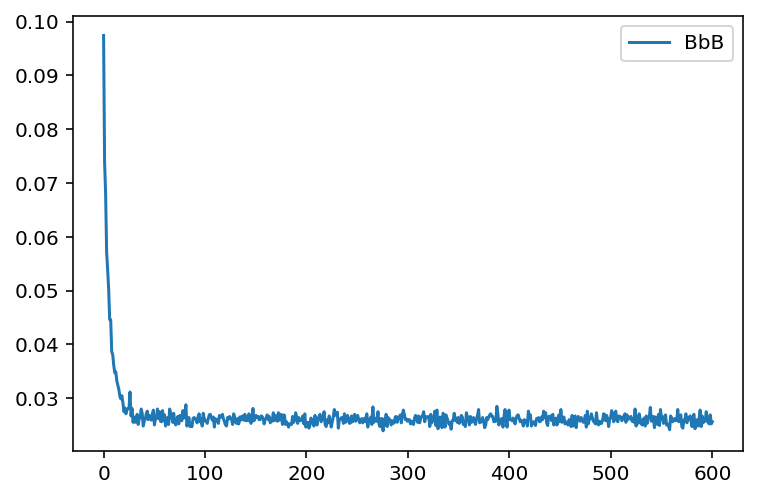

In [37]:
ACC_1=[]
for i in range(len(ACC_re2)):
    ACC_1.append(1-ACC_re2[i])
    
x = torch.linspace(0,600,600).reshape(-1,1)
plt.plot(x.numpy(),ACC_1,label = 'BbB')

plt.legend()
plt.show()

In [40]:
with open("dropout.txt","r") as f:
    a=f.readlines()
    

In [41]:
a

['0 : Loss: 2.2891285268566275, Accuracy: 0.1294501582278481\n',
 '1 : Loss: 2.2704674231855173, Accuracy: 0.1776107594936709\n',
 '2 : Loss: 2.2516056314299377, Accuracy: 0.22290348101265822\n',
 '3 : Loss: 2.2309255509436885, Accuracy: 0.27264636075949367\n',
 '4 : Loss: 2.203120542477958, Accuracy: 0.3130933544303797\n',
 '5 : Loss: 2.1666771792158297, Accuracy: 0.36550632911392406\n',
 '6 : Loss: 2.12670376632787, Accuracy: 0.39823971518987344\n',
 '7 : Loss: 2.0743688571302195, Accuracy: 0.4345332278481013\n',
 '8 : Loss: 2.0041482720193984, Accuracy: 0.4756724683544304\n',
 '9 : Loss: 1.9202254738988755, Accuracy: 0.5043512658227848\n',
 '10 : Loss: 1.8243195346639127, Accuracy: 0.5239319620253164\n',
 '11 : Loss: 1.723876088480406, Accuracy: 0.5408425632911392\n',
 '12 : Loss: 1.6107506118243253, Accuracy: 0.5684335443037974\n',
 '13 : Loss: 1.4893333926985535, Accuracy: 0.5902887658227848\n',
 '14 : Loss: 1.3918319729310047, Accuracy: 0.6019580696202531\n',
 '15 : Loss: 1.29861

In [42]:
len(a)

600

In [46]:
float(a[1].split()[-1][:6])

0.1776

In [48]:
ACC_2=[]
for i in range(len(a)):
    ACC_2.append(1-float(a[i].split()[-1][:6]))

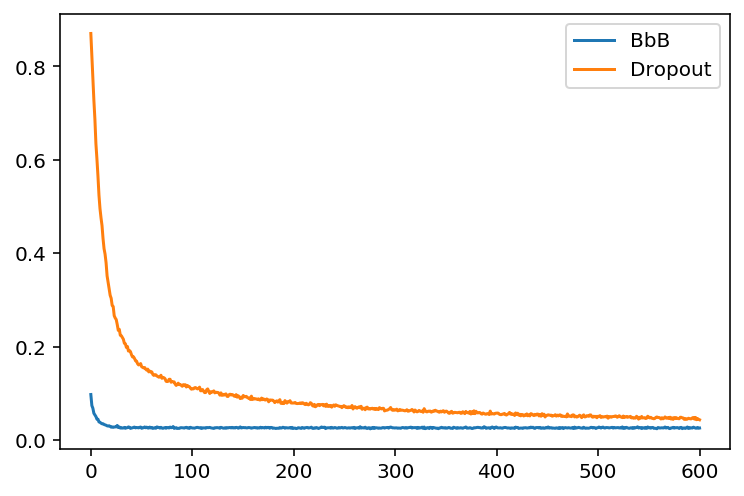

In [49]:
ACC_1=[]
for i in range(len(ACC_re2)):
    ACC_1.append(1-ACC_re2[i])
    
x = torch.linspace(0,600,600).reshape(-1,1)
plt.plot(x.numpy(),ACC_1,label = 'BbB')
plt.plot(x.numpy(),ACC_2,label = 'Dropout')

plt.legend()
plt.show()

In [50]:
with open("standard.txt","r") as f:
    b=f.readlines()
ACC_3=[]
for i in range(len(b)):
    ACC_3.append(1-float(b[i].split()[-1][:6]))

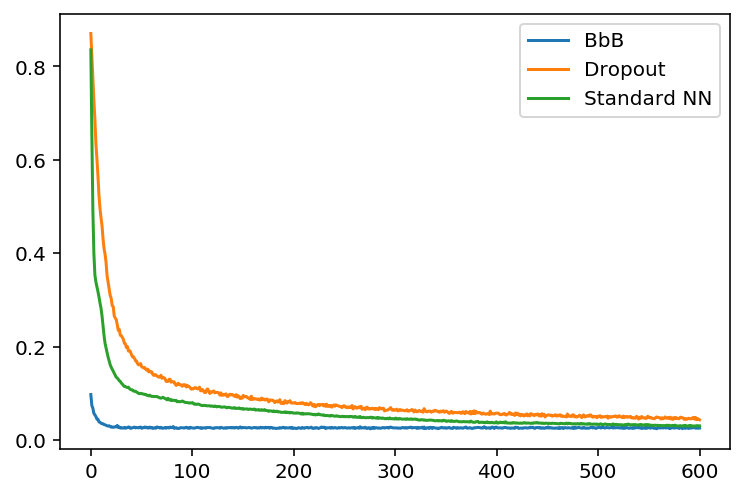

In [51]:
x = torch.linspace(0,600,600).reshape(-1,1)
plt.plot(x.numpy(),ACC_1,label = 'BbB')
plt.plot(x.numpy(),ACC_2,label = 'Dropout')
plt.plot(x.numpy(),ACC_3,label = 'Standard NN')

plt.legend()
plt.show()

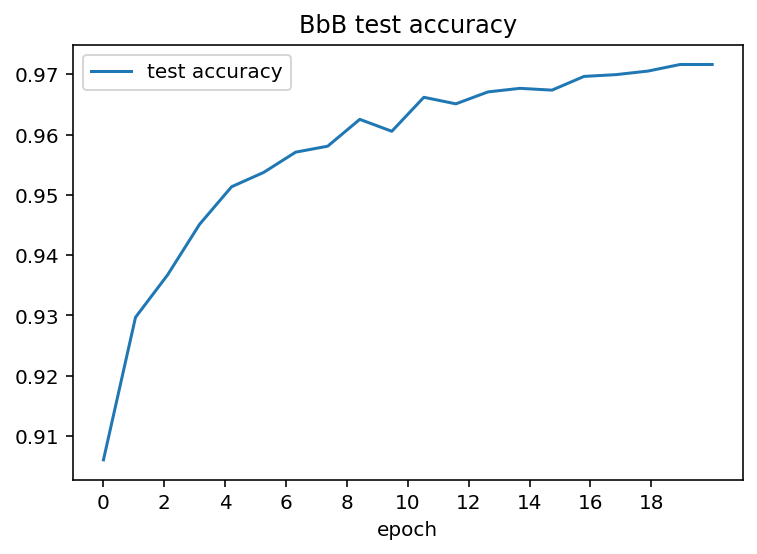

In [17]:
x_test = torch.linspace(0,20,20).reshape(-1,1)
plt.plot(x_test.numpy(),ACC_re2,label = 'test accuracy')
plt.title('BbB test accuracy')

my_x_ticks = np.arange(0, 20, 2)
plt.xticks(my_x_ticks)
plt.xlabel('epoch')

plt.legend()
plt.savefig("BbB test accuracy")
plt.show()